# Taller de NLP: Word2Vec

In [1]:
#%load_ext watermark
#%watermark -a 'Santiago Alferez' --iversions

In [2]:
# numpy     : 1.21.2
# pandas    : 1.3.5
# re        : 2.2.1
# nltk      : 3.6.7
# sklearn   : 1.0.2
# matplotlib: 3.5.0
# scipy     : 1.7.3
# gensim    : 4.0.1

In [3]:
import pandas as pd
import nltk

Para este taller deberás disponer de algunas librerías como scikit-learn, NLTK, y GenSim. Se recomienda revisar la [documentación de GenSim](https://radimrehurek.com/gensim/auto_examples/index.html#documentation).

## Cargando un modelo  en GenSim y análisis
A continuación cargaremos un modelo que no pesa tanto `glove-twitter-50`. Hay modelos más completos y con mayor número de dimensiones en este [link](https://github.com/RaRe-Technologies/gensim-data)

In [4]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

In [5]:
wv = api.load("glove-twitter-50")

Una operación común es recuperar el vocabulario de un modelo. Eso es trivial:

In [6]:
#!pip install --upgrade gensim

In [7]:
for index, word in enumerate(wv.index_to_key):
    if index == 20:
        break
    print(f"palabra #{index}/{len(wv.index_to_key)} es {word}")

palabra #0/1193514 es <user>
palabra #1/1193514 es .
palabra #2/1193514 es :
palabra #3/1193514 es rt
palabra #4/1193514 es ,
palabra #5/1193514 es <repeat>
palabra #6/1193514 es <hashtag>
palabra #7/1193514 es <number>
palabra #8/1193514 es <url>
palabra #9/1193514 es !
palabra #10/1193514 es i
palabra #11/1193514 es a
palabra #12/1193514 es "
palabra #13/1193514 es the
palabra #14/1193514 es ?
palabra #15/1193514 es you
palabra #16/1193514 es to
palabra #17/1193514 es (
palabra #18/1193514 es <allcaps>
palabra #19/1193514 es <elong>


In [8]:
vec_king = wv['king']

In [9]:
vec_king

array([-0.77201  , -0.16548  ,  0.22263  , -0.56608  ,  0.15602  ,
       -0.050659 ,  0.076896 ,  0.90058  , -0.22829  , -0.083794 ,
       -0.0087308,  0.12425  , -3.6283   , -0.70631  ,  0.3391   ,
       -0.26866  ,  0.012886 ,  0.1314   ,  0.13072  ,  0.1594   ,
       -0.43884  ,  0.30631  , -0.51841  , -0.86402  ,  0.89706  ,
       -0.29222  ,  0.071633 , -0.7285   ,  0.47514  , -0.54581  ,
        0.37375  , -0.2815   , -0.82164  , -0.1245   ,  0.06561  ,
        0.2686   ,  0.12587  , -0.50189  ,  0.41322  , -0.40509  ,
       -0.88866  , -0.71627  , -0.010728 , -0.29513  ,  0.098062 ,
        0.47936  ,  0.49517  , -0.30246  ,  0.37465  ,  0.010619 ],
      dtype=float32)

Desafortunadamente, el modelo no puede inferir vectores para palabras desconocidas. Esta es una limitación de Word2Vec: si esta limitación le importa, consulte el modelo FastText.

In [10]:
wv["cielo"]

array([-1.5430e+00, -4.2813e-01,  1.0533e-01,  7.3848e-01, -7.9404e-01,
       -8.1485e-01, -7.8022e-01, -6.3056e-01, -6.9569e-01, -4.4042e-01,
        6.4540e-01,  9.8029e-02, -9.5671e-01,  4.7736e-03, -4.9789e-02,
        2.0897e-01,  2.0517e-01,  7.0512e-01, -2.5358e-03, -6.6514e-01,
        7.0631e-01, -2.2168e-01, -1.1996e-01,  5.9615e-02,  1.1774e-01,
       -3.8541e+00, -1.0501e+00, -8.8617e-01,  1.1176e+00, -1.2043e-01,
        1.3221e-01,  1.3601e-01,  5.5741e-01,  9.5851e-01,  5.8929e-01,
       -2.6404e-01, -4.0333e-03,  7.8138e-01, -8.9081e-01,  1.3053e+00,
       -1.0139e+00, -4.8009e-01,  4.1195e-01,  7.5741e-01, -9.6583e-01,
        1.0335e+00,  2.5750e-01,  6.4759e-01,  2.6691e-01,  2.1797e-02],
      dtype=float32)

Continuando, Word2Vec admite varias tareas de similitud de palabras listas para usar. Puedes ver cómo la similitud (¿Que similitud será?) disminuye intuitivamente a medida que las palabras se vuelven cada vez menos similares.

In [11]:
pairs = [
    ('gato', 'perro'),   
    ('gato', 'tigre'),   
    ('gato', 'rana'),  
    ('gato', 'nube'),   
    ('gato', 'politica'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'gato'	'perro'	0.85
'gato'	'tigre'	0.65
'gato'	'rana'	0.38
'gato'	'nube'	0.28
'gato'	'politica'	0.15


Podemos encontrar las palabras más similares de acuerdo a una medida de similaridad ([la similaridad del coseno](https://en.wikipedia.org/wiki/Cosine_similarity)):

In [12]:
pd.DataFrame(wv.most_similar(positive=['carro', 'camión'], topn=5), columns=["palabra", "similaridad"])

,palabra,similaridad
0,camion,0.847325
1,coche,0.836260
2,autobús,0.834142
3,helicóptero,0.820165
4,avión,0.792418


¿Cuál de estos no pertenece a la secuencia?

In [13]:
print(wv.doesnt_match(['fuego', 'agua', 'tierra', 'mar', 'aire', 'carro']))

carro


### Analogias

Se ha demostrado que los vectores de palabras *a veces* exhiben la capacidad de resolver analogías.

Como ejemplo, para la analogía "hombre: rey :: mujer: x" (léase: el hombre es al rey como la mujer es a x), ¿qué es x?

En la celda a continuación, se muestra cómo usar vectores de palabras para encontrar x usando la función `most_similar` de la [documentacion de GenSim](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similares). La función encuentra palabras que son más similares a las palabras en la lista "positiva" y más diferentes de las palabras en la lista "negativa" (mientras omite las palabras de entrada, que a menudo son las más similares). La respuesta a la analogía tendrá la mayor similitud del coseno (mayor valor numérico devuelto).

In [14]:
# esta es la analogia -- hombre : rey :: mujer : x
wv.most_similar(positive=['mujer', 'rey'], negative=['hombre'])

[('reina', 0.823491632938385),
 ('diana', 0.7247894406318665),
 ('victoria', 0.7241206169128418),
 ('shakira', 0.716420590877533),
 ('chica', 0.7134189605712891),
 ('luna', 0.6988049149513245),
 ('colombiana', 0.6971471905708313),
 ('canción', 0.6866006851196289),
 ('dulce', 0.6847524046897888),
 ('karina', 0.6814141869544983)]

#### Ejercicio 1
Cree una función denominada `analogia(a,b,c)` donde determine la analogía *a* : *b* :: *c* : *d*, es decir retorne a *d*, como en el ejemplo anterior. Pruebe la función con 5 analogías que se le ocurra (en inglés o en españól, pero no combinadas)

In [15]:
def analogia(a,b,c):
  lista = wv.most_similar(positive=[a,b],negative=[c])
  return lista

In [16]:
analogia('guerra','arma','argumento')

[('nave', 0.7607540488243103),
 ('fuga', 0.7099862098693848),
 ('bomba', 0.6898825764656067),
 ('fuego', 0.6893657445907593),
 ('armada', 0.6711723804473877),
 ('vela', 0.670769989490509),
 ('guardia', 0.6443314552307129),
 ('tumba', 0.6434605121612549),
 ('luz', 0.6410224437713623),
 ('contra', 0.6375953555107117)]

In [17]:
analogia('blanco','dia','negro')

[('lua', 0.675154983997345),
 ('lima', 0.6488125920295715),
 ('natal', 0.6467389464378357),
 ('ia', 0.6377823948860168),
 ('cita', 0.633175253868103),
 ('muda', 0.6235405802726746),
 ('bunda', 0.6128411889076233),
 ('mel', 0.6116131544113159),
 ('sem', 0.6108430624008179),
 ('luar', 0.6046234965324402)]

In [18]:
analogia('cafe','caliente','frio')

[('bistro', 0.725406289100647),
 ('restaurant', 0.7057770490646362),
 ('salsa', 0.7045158743858337),
 ('recipe', 0.6571690440177917),
 ('mango', 0.6566164493560791),
 ('bar', 0.6561848521232605),
 ('pizzeria', 0.6549121141433716),
 ('buffet', 0.6519568562507629),
 ('mojito', 0.6510596871376038),
 ('mambo', 0.6437466144561768)]

In [19]:
analogia('estudiante', 'examenes', 'profesor')

[('activados', 0.6740912795066833),
 ('parciales', 0.649668276309967),
 ('huelga', 0.647428035736084),
 ('ejecutados', 0.638768196105957),
 ('escasos', 0.6371156573295593),
 ('activos', 0.6342213749885559),
 ('fallecidos', 0.6277273893356323),
 ('resaca', 0.627128005027771),
 ('apagones', 0.6265959739685059),
 ('trabajos', 0.6212835907936096)]

In [20]:
analogia('leer', 'aprender', 'correr')

[('escribir', 0.7987489700317383),
 ('traducir', 0.7341846227645874),
 ('lectura', 0.6656689047813416),
 ('interpretar', 0.663116991519928),
 ('dedicar', 0.6559026837348938),
 ('oír', 0.6551762819290161),
 ('libros', 0.653024435043335),
 ('redactar', 0.6510983109474182),
 ('leerme', 0.6461646556854248),
 ('libro', 0.6443162560462952)]

#### Ejercicio 2
Haga un listado de unas 20 palabras y grafiquelas en dos dimensiones (colocando su texto) junto con unas 200 palabras muestreadas aleatoriamente (sin texto). Use para reducir la dimensión PCA. Repita lo mismo usando UMAP.

In [21]:
from sklearn.decomposition import PCA

def f_get_words(text_, cat_palabras):
  global wv
  word_similitud = wv.similar_by_word(text_, topn=cat_palabras)
  similar_words = list()

  for i in range(len(word_similitud)):
    if word_similitud[i][1]>0:
      temp=word_similitud[i][0]
      similar_words.append(temp)

  vectors = wv[similar_words]

  return vectors, similar_words


para_pca, nombres_para_pca =  f_get_words(text_= 'perro', cat_palabras=200)
para_pintar, nombres_para_pintar =  f_get_words(text_= 'razas', cat_palabras=20)

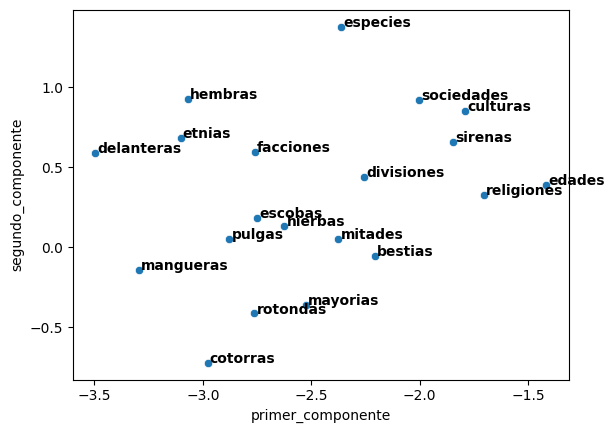

In [22]:
#reducir dimensionalidad por componentes con PCA.
reduccion =  PCA(random_state=0, n_components  = 2).fit(para_pca)

#transformando los datos de los pntos
puntos_plot = reduccion.transform(para_pintar)

# organizando para pintar via sns
base=pd.DataFrame()
base["primer_componente"]=puntos_plot[:,0]
base["segundo_componente"]=puntos_plot[:,1]
base["nombres"]=nombres_para_pintar
#display(base)

import seaborn as sns #visializacoines
graf1=sns.scatterplot(x="primer_componente", y="segundo_componente", data=base)

for line in range(0,base.shape[0]):
     graf1.text(base.primer_componente[line]+0.01, base.segundo_componente[line], 
     base.nombres[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

In [23]:
# USANDO umap

#!pip install umap-learn

import umap.umap_ as umap

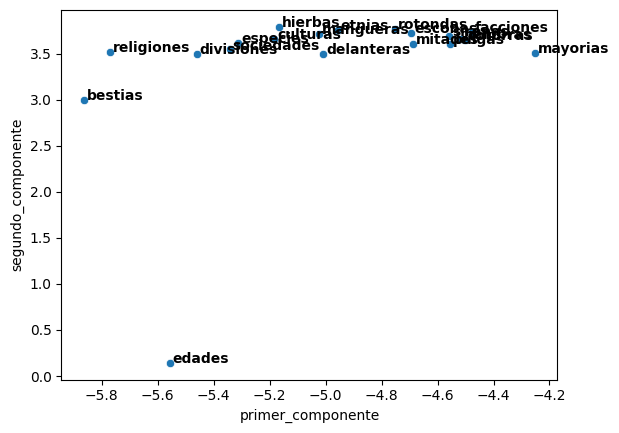

In [24]:


reducer = umap.UMAP(random_state=0)

embedding = reducer.fit(para_pca)

points_plot = embedding.transform(para_pintar)

# organizando para pintar via sns
base=pd.DataFrame()
base["primer_componente"]=points_plot[:,0]
base["segundo_componente"]=points_plot[:,1]
base["nombres"]=nombres_para_pintar
#display(base)

import seaborn as sns #visializacoines
graf1=sns.scatterplot(x="primer_componente", y="segundo_componente", data=base)

for line in range(0,base.shape[0]):
     graf1.text(base.primer_componente[line]+0.01, base.segundo_componente[line], 
     base.nombres[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

-----

GenSim permite acceder a las palabras mediante diferentes formas sobre un objeto `KeyedVectors` (el wv de antes es uno). `.index_to_key`produce una lista con el vocabulario de forma ordenada, mientras `.key_to_index` produce un diccionario de la forma {palabra: index}.

In [25]:
print(wv.index_to_key[100:120])

['_', 'mi', 'can', '<sadface>', 'من', '♡', '´', 'he', 'con', 'they', 'now', 'go', '،', 'para', 'los', 'know', 'haha', 'good', 'tu', 'back']


## Entrene un nuevo modelo sobre un corpus

Trabajaremos de nuevo con el dataset de `progressive-tweet-sentiment.csv`, el cuál es un dataset pequeño que nos facilitará probar Word2vec. Sin embargo, los resultados pueden no ser tan buenos, dado que Word2vec es más potente cuando el corpus es más grande.

`progressive-tweet-sentiment`  tiene algunos tweets recopilados y categorizados en 4 clases: 'Legalization of Abortion', 'Hillary Clinton', 'Feminist Movement', 'Atheism'. 

In [26]:
df = pd.read_csv("data/progressive-tweet-sentiment.csv",encoding='latin-1')

In [27]:
df = df[["target", "tweet"]]
df.head()

,target,tweet
0,Legalization of Abortion,Thank you for another day of life Lord. #Chris...
1,Legalization of Abortion,@rosaryrevival Lovely to use Glorious Mysterie...
2,Legalization of Abortion,@Niall250 good thing is that #DUP have consist...
3,Legalization of Abortion,"So, you tell me... is murder okay if the victi..."
4,Legalization of Abortion,@HillaryClinton Don't you mean to say (all chi...


#### Ejercicio 3. 
Realice procedimientos para preprocesar texto cómo: tokenizar, eliminar stopwords, stemming y lemmatization. Al final, el resultado de dicho procesamiento debe ser un texto (no una lista de palabras). Sugerencia: inicie y finalice con métodos de strings de python como `.join()` o `.split()`. (Esto ya lo han hecho en el taller anterior).

Nota: En NLP, a menudo agregamos tokens <START> y <END> para representar el principio y el final de oraciones, párrafos o documentos. En este caso, pueden colocar tokens `<START>` y `<END>` encapsulando cada documento, por ejemplo, "<START> All that glitters not gold <END>", y se puede incluir los tokens en el corpus completo. No es necesario hacer esto para el ejercicio, pero sería interesante.

In [28]:
import re
def limpieza(text):
  #text=re.sub(r'@_[A-Za-z0-9]+_','',text) #Remover @_menciones_
  #text=re.sub(r'@[A-Za-z0-9]+_[A-Za-z0-9]+','',text) #Remover @menciones_
  #text=re.sub(r'@[A-Za-z0-9]+','',text) #Remover @menciones
  text=re.sub(r'https?:\/\/\S+','',text) #Remover Hypervinculos
  text=re.sub(r'RT[\s]+','',text) #Remover Retweets
  #text=re.sub(r'#[A-Za-z0-9]+','',text) #Remover "#"
  #text=re.sub(r'[0-9]','',text) #remover numeros
  text=re.sub(r'[^\w\s]',"",text) #remover signos de puntuacion
  text=re.sub(r'\n|\t',' ',text) #remover saltos de linea
  text=re.sub(r'\@',' ',text) #remover "@"
  text=re.sub(r'[\s]+',' ',text) #reemplazar espacios dobles por espacion sencillos
  text=re.sub(r"^[\s]",' ',text) #eliminar espacios al inicio de cada tweet
  text=text.lower() #todo a minuscula
  return text

In [29]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessuarez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#limpieza inicial de los tweetseza)
# Excluir stopwords
df['text_clean']=df["tweet"].apply(limpieza)
df['text_clean'] = df["text_clean"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
df['text_clean'] 

0       thank another day life lord christian catholic...
1       rosaryrevival lovely use glorious mysteries ea...
2       niall250 good thing dup consistently said murd...
3               tell murder okay victim mentally disabled
4       hillaryclinton dont mean say children deserve ...
                              ...                        
1154    created heavens earth mere play quran 4438 ath...
1155        god wonderful way turning negatives positives
1156    week going grrrrrrrreat spiritual business wel...
1157    humanity deeper race gender religion love love...
1158                                   strength life lord
Name: text_clean, Length: 1159, dtype: object

In [31]:
#Debe quedar algo asi:

### Entrada al modelo
Para entrenar un modelo en GenSim es importante adecuar el texto a una lista de sentencias (y cada sentencia una lista de tokens). Para corpus muy grandes, es mejor crear un iterador (una función que extraiga documento a documento para evitar llenar la memoria). 

Por ejemplo las tres primeras sentencias del dataset son:

In [32]:
df['text_clean']

0       thank another day life lord christian catholic...
1       rosaryrevival lovely use glorious mysteries ea...
2       niall250 good thing dup consistently said murd...
3               tell murder okay victim mentally disabled
4       hillaryclinton dont mean say children deserve ...
                              ...                        
1154    created heavens earth mere play quran 4438 ath...
1155        god wonderful way turning negatives positives
1156    week going grrrrrrrreat spiritual business wel...
1157    humanity deeper race gender religion love love...
1158                                   strength life lord
Name: text_clean, Length: 1159, dtype: object

In [33]:
listado = []
for i in range(len(df)):
  listado.append (list(df['text_clean'][i].split(' ')))

In [34]:
print(listado)

[['thank', 'another', 'day', 'life', 'lord', 'christian', 'catholic', 'teamjesus'], ['rosaryrevival', 'lovely', 'use', 'glorious', 'mysteries', 'eastertide', 'mark', 'season', 'prayforpersecutedchurch'], ['niall250', 'good', 'thing', 'dup', 'consistently', 'said', 'murder', 'wrong', 'sf', 'pro', 'murderstill'], ['tell', 'murder', 'okay', 'victim', 'mentally', 'disabled'], ['hillaryclinton', 'dont', 'mean', 'say', 'children', 'deserve', 'chances', 'except', 'unborn', 'children'], ['far', 'sorry'], ['every', 'time', 'respond', 'something', 'frustrates', 'let', 'steal', 'away', 'time', 'happiness', 'easyweightloss'], ['follow', 'patriot', 'enuffis2much', 'thanks', 'following', 'back', 'truth', 'liberty', 'justice', 'proisrael', 'wakeupamerica', 'freeamirnow'], ['catholicsfollow', 'want', 'great', 'catholic', 'followers', 'retweet', 'follow', 'us', 'catholic', 'tcot', 'tgdn', 'pjnet', 'cathol'], ['adammyerson', 'quarq', 'sent', 'mine', 'two', 'days', 'ago', 'expect', 'back', 'two', 'days',

In [35]:
len(listado)

1159

#### Ejercicio 4
Entrene un modelo usando `gensim.models.word2vec.Word2Vec`, partiendo de la siguiente configuración de parámetros.

In [36]:
b=1

In [37]:
vector_size = 100 # numero de elementos del vector que representa la palabra
min_count =3 # Ignores all words with total frequency lower than this. 
workers = 5 # numero de cpu cores
sg = 0 # 0: CBOW, 1: skip-gram
window = 6 # Tamano de la ventana de contexto
sample = 1e-3 # tasa de submuestreo para terminos frecuentes

In [38]:
from gensim.models import Word2Vec

In [39]:
model = Word2Vec(listado, vector_size=vector_size,min_count=min_count, workers=workers,sg=sg,window=window,sample=sample)

# Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)


#### Ejercicio 5
Ahora ha obtenido un modelo de Word2vec en el cual tiene una representación embebida de cada palabra. Esta representación la puede extraer para cada palabra usando `model.wv.get_vector(palabra)`. Sin embargo, ¿Qué representación podemos obtener para cada tweet (documento o sentencia) a partir de todas las palabras? 

Cree una función que extraiga para cada tweet un representación vectorial única (un vector) y añada una nueva columna con esta representación. Sugerencia: una suma (pero será lo mejor?). El resultado es algo similar a la celda siguiente:

In [40]:
#funcion para calcular el promedio de los vectores de cada token por tweet
import numpy as np
tweet_vector=[]
for i in range(len(listado)):
  v1=[0 for i in range(vector_size)]
  for j in range(len(listado[i])):
    if listado[i][j] in model.wv:
      v2=model.wv.get_vector(listado[i][j])
      v2=1/np.log(1+v2)
      v1=[v1[k] + v2[k] for k in range(len(v1))]
  v1=[v1[k]/len(v1) for k in range(len(v1))]
  tweet_vector.append(v1)

#tweet_vector

df2=df[:]
df2
df2['vectors']=tweet_vector
df2.head(n=5)
#len(tweet_vector)


#df2.vectors[0:10]

/var/folders/1z/1h5_y8x165n9_dtqpqg0vsw07w60nb/T/ipykernel_76701/1109444415.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vectors']=tweet_vector


,target,tweet,text_clean,vectors
0,Legalization of Abortion,Thank you for another day of life Lord. #Chris...,thank another day life lord christian catholic...,"[15.555565414428711, -21.681191787719726, 1.99..."
1,Legalization of Abortion,@rosaryrevival Lovely to use Glorious Mysterie...,rosaryrevival lovely use glorious mysteries ea...,"[-5.332012481689453, 1.4192860412597657, -2.54..."
2,Legalization of Abortion,@Niall250 good thing is that #DUP have consist...,niall250 good thing dup consistently said murd...,"[4.475017623901367, 17.070967864990234, 130.84..."
3,Legalization of Abortion,"So, you tell me... is murder okay if the victi...",tell murder okay victim mentally disabled,"[0.3637225341796875, 7.774762802124023, 1.7756..."
4,Legalization of Abortion,@HillaryClinton Don't you mean to say (all chi...,hillaryclinton dont mean say children deserve ...,"[54.30008842468262, 10.813221282958985, 22.070..."


#### Ejercicio 6.
Lo que se ha generado antes son unas determinadas variables, para cada tweet, úselas para realizar una clasificación. Para esto divida en un conjunto de entrenamiento y uno de prueba (20%) con una semilla fija (42) y construya un clasificador (recomendado Random Forest). Evalúe el desempeño del clasificador en el conjunto de prueba con el accuracy.  El accuracy debe estar alrededor del 70%. Para lograrlo, tendrá que cambiar la longitud del vector, el ancho de la ventana, si es skip-gram o CBOW, el método de obtención de un sólo documento, etc.


In [41]:
#convertir vectores en dataframe
X=pd.DataFrame(tweet_vector)
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,15.555565,-21.681192,1.996221,16.022712,-11.724365,-17.062546,-2.640279,-1.811981,0.403907,-37.123410,...,14.864277,85.451653,-10.043007,174.765590,2.360021,258.411800,7.170050,12.242084,-10.535938,0.730419
1,-5.332012,1.419286,-2.545549,0.434357,0.371666,-4.187317,-9.986508,4.908841,-11.363887,14.620466,...,-0.951478,-1.111503,-4.512107,-8.196911,-14.435382,2.846959,-2.018615,-7.463765,-5.145030,8.229682
2,4.475018,17.070968,130.843722,10.745413,-26.926537,-6.149995,-3.155643,8.510624,-16.866741,-2.734578,...,-41.101851,1.828912,-8.888993,162.386938,1.149139,4.699490,14.768171,-17.744857,11.203874,11.774597
3,0.363723,7.774763,1.775696,-54.638284,22.049079,0.868746,4.185522,-2.189099,13.957224,-2.330243,...,16.974331,-9.108699,4.025744,169.227248,-4.518851,-2.567999,6.861566,-7.904153,-5.764486,24.776475
4,54.300088,10.813221,22.070850,5.184014,-1.007312,-32.639519,-15.422997,1.387184,-7.600223,117.588661,...,13.223535,-520.514433,-4.683723,-11.878964,25.367466,16.056049,82.450259,2.610287,-90.217237,-5.472751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1.698572,116.209523,-4.096319,-4.882455,3.690395,-0.965227,-1.913512,-4.484128,-3.292944,5.300041,...,3.913714,-1.727972,-28.995015,4.516275,8.108433,4.488681,17.182684,-3.517370,-5.971124,-8.564371
1155,-4.841469,1.703147,2.572368,6.044291,2.761244,-1.085031,0.372840,1.710685,-1.596293,-32.512516,...,1.610837,-6.172880,98.498356,-0.724289,2.876388,1.402875,-0.665866,59.915971,-12.103288,2.405846
1156,-4.975082,8.656910,-5.861648,-3.962346,-0.438613,-1.408651,6.002463,-1.019894,1.588517,0.100352,...,2.168994,-0.576060,-5.800461,2.803589,-0.683464,1.313140,-4.394463,4.644866,11.876604,3.312728
1157,13.136825,-0.504885,-3.657483,2.708472,41.530112,-38.905781,6.758575,10.505673,-7.861873,-53.089016,...,6.627759,106.525977,-0.950110,-5.766685,-200.879815,6.464160,-14.706962,-48.015590,18.847875,-10.908189


In [42]:
#obtener variable objetivo
y=pd.DataFrame(df2['target'])
y

,target
0,Legalization of Abortion
1,Legalization of Abortion
2,Legalization of Abortion
3,Legalization of Abortion
4,Legalization of Abortion
...,...
1154,Atheism
1155,Atheism
1156,Atheism
1157,Atheism


In [43]:
X[X==np.inf]=np.nan
X.fillna(X.mean(), inplace=True)


In [44]:
#separar dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #tomar el 20% de los datos para validacion y definir la semilla en cero

In [45]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
58,-30.856889,7.919600,-3.142102,31.658730,-15.150364,-21.412174,4.033920,-31.802850,7.824937,4.289851,...,-0.133048,-5.621612,1.478137,-0.742248,1.443791,-159.442671,6.813643,-14.387994,-1.332498,-2.821401
333,-4.017346,43.067876,-0.481392,-4.253841,4.056060,27.257412,-68.992106,18.163037,20.486409,-25.588056,...,20.652843,10.624279,12.606986,262.819322,23.007712,11.001238,-0.917249,32.470709,2.365128,21.652329
332,-62.044647,7.273740,-2.071117,19.566032,6.352478,-1.968946,-54.753100,11.599123,-3.193141,-1.936266,...,10.738194,7.860788,-2.701330,6.355600,-21.663357,-14.694533,-3.039451,-2.154260,-0.364217,3.153830
1065,6.720579,10.882177,-1.590681,24.979182,33.447691,-39.077457,774.146977,-3.543342,7.681042,-0.879791,...,12.903409,1.377575,6.807452,8.076878,6.551115,-20.469836,-14.238289,-5.478202,-9.151113,11.417753
63,-17.099935,5.993621,45.484153,39.800337,0.942036,17.389893,3.654040,-0.948642,-12.039189,9.579263,...,1.981543,-20.202656,-19.176160,-97.549236,3.540150,-3.294388,16.467509,-7.277687,2.012824,2.348604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,-12.805713,6.097330,31.594215,7.981278,-18.067489,-4.310826,13.073118,-18.301883,-16.975947,28.616699,...,1.678889,-1.541383,203.914346,-43.133722,7.640841,3.591266,3.556206,-3.324274,492.281200,-3.422101
1095,2.639661,-4.400741,-15.078285,12.060091,-6.904224,5.185188,0.931418,-0.748269,23.046681,-13.501682,...,1.087122,-3.788209,-2.822580,2.878887,15.510915,-6.006477,58.045293,1.250166,3.246323,-1.032710
1130,-10.407528,9.840681,30.922334,-17.826063,4.454564,5.482497,-34.070014,-5.747985,-3.904377,36.239898,...,37.649808,6.871705,82.808534,-0.120813,7.210315,10.919183,5.065485,-19.593863,-3.680380,5.629098
860,15.193559,6.508100,2.327649,0.219438,5.090432,-2.510429,4.271239,2.851000,8.061459,-2.085022,...,0.641770,14.599736,28.217183,5.385097,6.376777,4.882066,-10.338692,-80.497884,3.657278,20.994390


In [46]:
#definir semilla
import random
random.seed(10)
#Importar modelo Ramdom Forest
from sklearn.ensemble import RandomForestClassifier
#Crear clasificador
clf=RandomForestClassifier(n_estimators=200,random_state=1000)
#Entrenar Modelo
clf.fit(X_train,y_train)
#predecir
y_pred=clf.predict(X_test)

/var/folders/1z/1h5_y8x165n9_dtqpqg0vsw07w60nb/T/ipykernel_76701/702847128.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [47]:
#Importar metricas scikit-learn 
from sklearn import metrics
# calcular el "accuracy"
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.625
